In [39]:
import pandas as pd

file_path = 'emails.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.info())
print(data.isnull().sum())


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
text    0
spam    0
dtype: int64


In [43]:
# Check the column names in the dataset
print(data.columns)

Index(['text', 'spam'], dtype='object')


0    4360
1    1368
Name: spam, dtype: int64


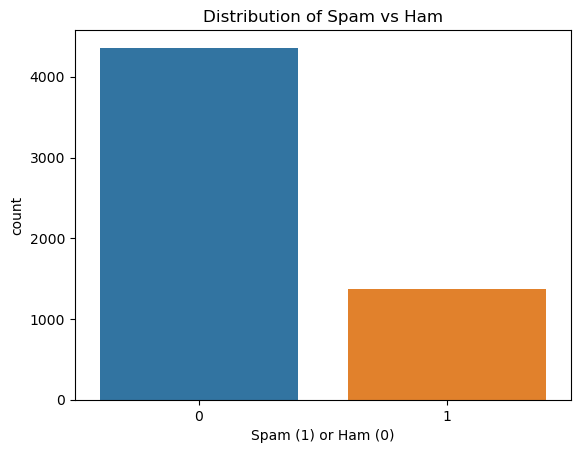

In [45]:
# Check the distribution of spam vs ham
print(data['spam'].value_counts())  # 'spam' column has spam labels

# Visualize the distribution using a bar plot
sns.countplot(x='spam', data=data)
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Spam (1) or Ham (0)')
plt.show()

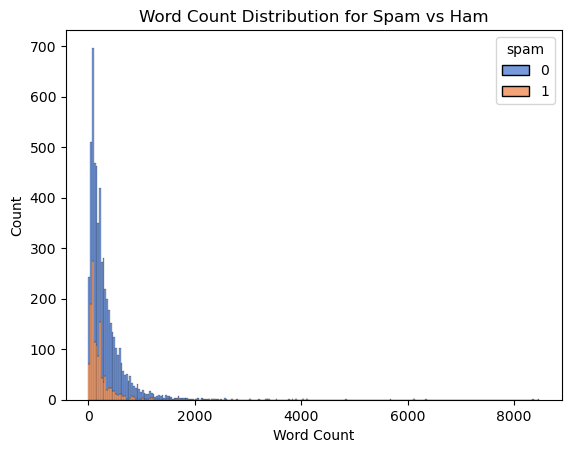

In [47]:
# Adding a column to represent word count in each message
data['Word Count'] = data['text'].apply(lambda x: len(str(x).split()))

# Plotting word count distribution for spam and ham
sns.histplot(data=data, x='Word Count', hue='spam', multiple='stack', palette='muted')
plt.title('Word Count Distribution for Spam vs Ham')
plt.xlabel('Word Count')
plt.show()


In [49]:
import re

# Function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Applying the clean function to the 'text' column
data['clean_text'] = data['text'].apply(clean_text)

# Display the cleaned text
print(data[['text', 'clean_text']].head())

                                                text  \
0  Subject: naturally irresistible your corporate...   
1  Subject: the stock trading gunslinger  fanny i...   
2  Subject: unbelievable new homes made easy  im ...   
3  Subject: 4 color printing special  request add...   
4  Subject: do not have money , get software cds ...   

                                          clean_text  
0  subject naturally irresistible your corporate ...  
1  subject the stock trading gunslinger fanny is ...  
2  subject unbelievable new homes made easy im wa...  
3  subject color printing special request additio...  
4  subject do not have money get software cds fro...  


In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # Adjust num_words based on dataset size
tokenizer.fit_on_texts(data['clean_text'])

# Convert the text into sequences
sequences = tokenizer.texts_to_sequences(data['clean_text'])

# Pad sequences to make them of uniform length
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)  # Adjust maxlen as needed

# Display the first padded sequence
print(padded_sequences[0])

[ 811   86   13    2  152    5  943 1194 4298 1020  270  246 2369 3354
  508    3 1920   18 4086   92 1168 1051  776    4 1345   28  649    8
   50 2430  773    3  146  636  103  217 4419  403   18  256  636    4
  396  144  892 4299    7   23  112  776 3973  230  455   72  251 4300
   18  407 1290  185 3355   89  110 3548    8   18 1261 2007 1195   21
  220 1865  680    5  387   20   99 1388 1939   10    7    3   19 4420
    7   23 1211    2  852    5   16 2269   24    6  137   25   42  641
   39  188]


In [53]:
from sklearn.model_selection import train_test_split

# Labels (spam = 1, ham = 0)
labels = data['spam'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 4582
Test set size: 1146


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),  # Embedding layer
    LSTM(64, return_sequences=True),  # LSTM layer
    Dropout(0.2),  # Dropout for regularization
    LSTM(32),  # Another LSTM layer
    Dense(32, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

E:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.7783 - loss: 0.5044 - val_accuracy: 0.8831 - val_loss: 0.3515
Epoch 2/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9121 - loss: 0.2931 - val_accuracy: 0.8909 - val_loss: 0.3458
Epoch 3/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9195 - loss: 0.2709 - val_accuracy: 0.9136 - val_loss: 0.2672
Epoch 4/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9271 - loss: 0.2128 - val_accuracy: 0.9503 - val_loss: 0.1502
Epoch 5/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9330 - loss: 0.2171 - val_accuracy: 0.8473 - val_loss: 0.3003


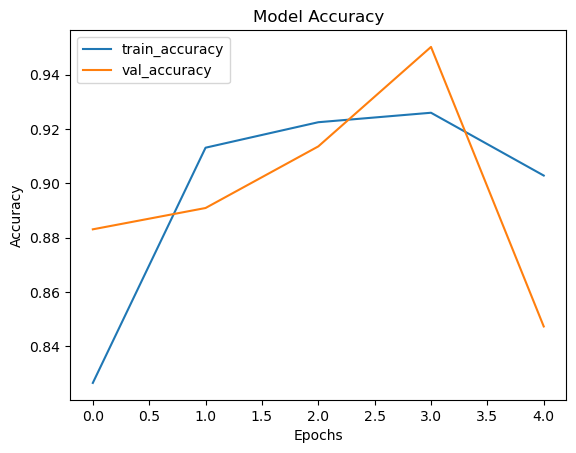

In [57]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8390 - loss: 0.2957
Test Loss: 0.3002570569515228
Test Accuracy: 0.8472949266433716


Epoch 1/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.8848 - loss: 0.2225 - val_accuracy: 0.9407 - val_loss: 0.2071
Epoch 2/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9669 - loss: 0.1092 - val_accuracy: 0.9634 - val_loss: 0.1320
Epoch 3/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9806 - loss: 0.0597 - val_accuracy: 0.9721 - val_loss: 0.0962
Epoch 4/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9891 - loss: 0.0396 - val_accuracy: 0.9799 - val_loss: 0.0724
Epoch 5/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9946 - loss: 0.0208 - val_accuracy: 0.9791 - val_loss: 0.0794


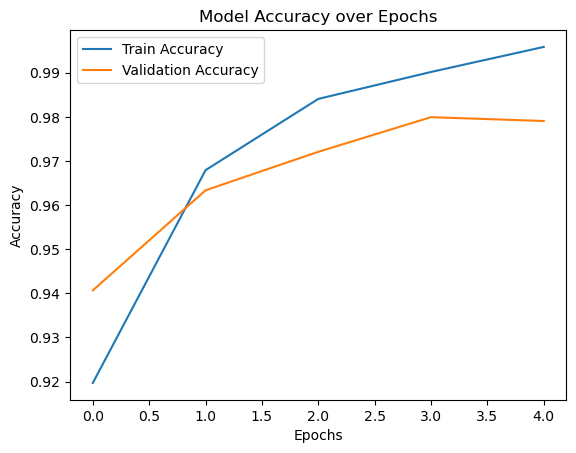

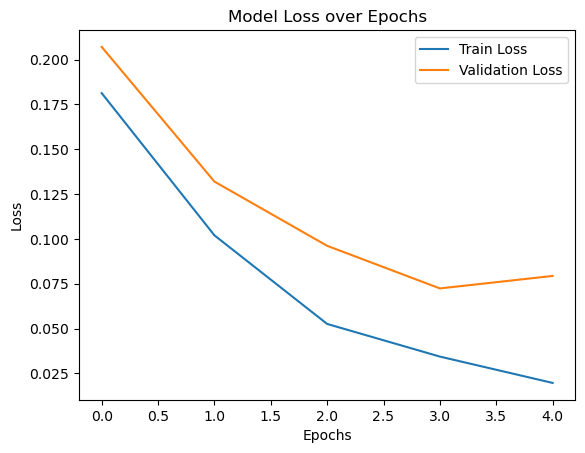

In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

# Visualize training vs validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize training vs validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [63]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9773 - loss: 0.0988
Test Loss: 0.0793539434671402
Test Accuracy: 0.9790576100349426


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99       856
        Spam       0.95      0.97      0.96       290

    accuracy                           0.98      1146
   macro avg       0.97      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146



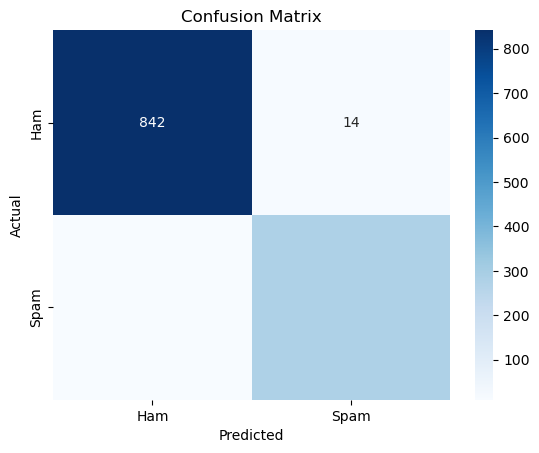

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Round the predictions to binary

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
model.save('spam_detector_model.h5')